# Example of using `pygosa`

We illustrate hereafter the use of the `pygosa` module.

In [1]:
import openturns as ot
import numpy as np
import pygosa
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We define `Sobol` use-case, which is very common in case of sensitivity analysis:

In [2]:
model = ot.SymbolicFunction(["x1","x2","x3"], ["sin(x1) + 7*sin(x2)^2 + 0.1*(x3^4)*sin(x1)"])
dist = ot.ComposedDistribution( 3 * [ot.Uniform(-np.pi, np.pi)] )

## Design of experiment

We define the experiment `design`: 

In [3]:
mcsp = pygosa.SensitivityDesign(dist=dist, model=model, size=1000)

The benefits of using a `crude` Monte-Carlo approach is the potential use of several contrasts.
In this demonstrate example, the used contrast are :

 - `Mean` contrast to derive its sensitivities
 - `Quantile` contrast to derive sensitivities for some specific quantile levels
 - `Mean` contrast to derive sensitivities for some specific threshold values


## Mean contrast & sensitivities

Hereafter we apply the `mean` contrast to the previous design in order to get the sensitivities :


/usr/lib/python2.7/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


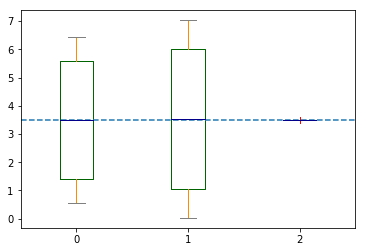

In [4]:
sam = pygosa.MeanSensitivities(mcsp)
factors_m = sam.compute_factors()
fig, ax = sam.boxplot()

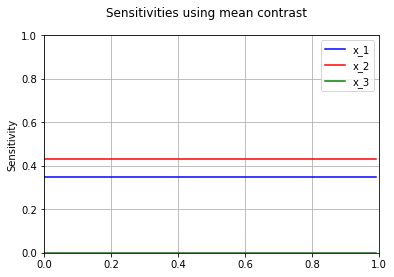

In [5]:
figure = pygosa.plot_mean_sensitivities(sam,set_labels=True)

## Quantile sensitivities

Hereafter we apply the `quantile` contrast to the previous design in order to get the sensitivities for quantile levels $\alpha=(5\%, 25\%, 50\%, 75\%, 95\%)$:

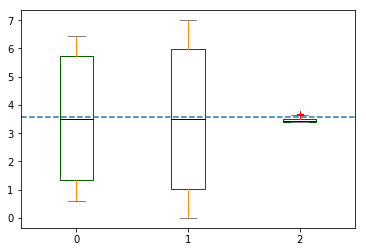

In [6]:
saq = pygosa.QuantileSensitivities(mcsp)
factors_q = [saq.compute_factors(alpha=q) for q in [0.05, 0.25, 0.50, 0.75, 0.95]]
fig, ax = saq.boxplot()

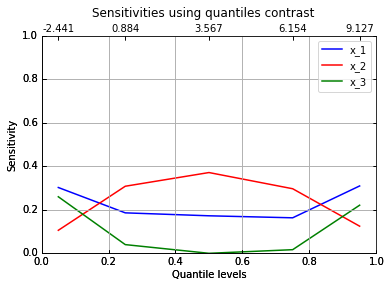

In [7]:
figure = pygosa.plot_quantiles_sensitivities(saq,set_labels=True)

## Probability sensitivities

Hereafter we apply the `probability` contrast to the previous design in order to get the sensitivities for thresholds $t=(-2.50, 0, 2.50, 7.0, 7.85)$:

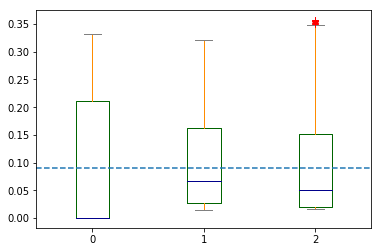

In [8]:
sap = pygosa.ProbabilitySensitivities(mcsp)
factors_p = [sap.compute_factors(threshold=v) for v in [-2.5, 0, 2.5, 7.0, 7.85]]
fig, ax = sap.boxplot(threshold=7.85)

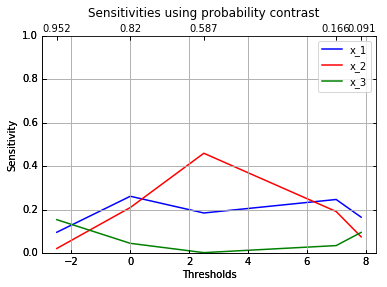

In [9]:
figure = pygosa.plot_probability_sensitivities(sap, set_labels=True)